# Imports

In [5]:
import numpy as np
import pandas as pd
import re

!pip install nltk

import nltk
from nltk.corpus import stopwords, words
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from nltk import wordpunct_tokenize
from nltk import download, classify, corpus
from nltk.probability import FreqDist
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize
from nltk import ngrams

from collections import Counter
import string

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import text

import matplotlib.pyplot as plt

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('vader_lexicon')
nltk.download('words')


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 32.9 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.9/97.9 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 770.4/770.4 kB 26.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.1/77.1 kB 5.0 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python -m pip install --upgrade pip


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /home/codespace/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data] Downloading package words to /home/codespace/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

# Loading Datasets

## Fake News

In [6]:
df_fakenews1 = pd.read_csv('/Users/admin/Desktop/FakeNews/fake news dataset.csv')
df_fakenews1.rename(columns={'article': 'Content'}, inplace=True) #renamed column


df_fakenews2 = pd.read_csv('/Users/admin/Desktop/FakeNews/fake_or_real_news.csv')
df_fakenews2.rename(columns={'text': 'Content'}, inplace=True) #renamed column

#combining two dataset into a single DataFrame
df_FakeNews = pd.concat([df_fakenews1, df_fakenews2], ignore_index=True)

#assigning new values (raplacing the existing values 'REAL' and 'FAKE' with 0 and 1, respectively in the 'label' column)
df_FakeNews['label'] = df_FakeNews['label'].replace({'REAL': 0, 'FAKE': 1})
df_FakeNews['label'] = df_FakeNews['label'].replace({0: 1, 1: 0})
df_FakeNews

FileNotFoundError: [Errno 2] No such file or directory: '/Users/admin/Desktop/FakeNews/fake news dataset.csv'

## News Sites

In [5]:
df_Rappler = pd.read_csv('/Users/admin/Desktop/FakeNews/rap_dataframe.csv')
df_Rappler

,Link,Author,Content
0,https://www.rappler.com/life-and-style/literat...,[],"MANILA, Philippines – Finally! Best-selling Ja..."
1,https://www.rappler.com/nation/new-findings-ki...,['JAIRO BOLLEDO'],"MANILA, Philippines – The results of the lates..."
2,https://www.rappler.com/sports/football/tom-br...,[],Tom Brady was the ultimate winner on the field...
3,https://www.rappler.com/life-and-style/health-...,[],It’s one thing to know what makes people happy...
4,https://www.rappler.com/entertainment/music/ju...,[],Justin Bieber is the latest artist in a growin...
...,...,...,...
1197,https://www.rappler.com/entertainment/pageants...,[],"MANILA, Philippines – Thai businesswoman and C..."
1198,https://www.rappler.com/world/asia-pacific/chi...,[],"BEIJING, China – Luggage-laden passengers floc..."
1199,https://www.rappler.com/sports/nba/game-result...,[],Kawhi Leonard and Terance Mann each eclipsed 3...
1200,https://www.rappler.com/sports/nba/game-result...,[],Nikola Vucevic continued his recent dominance ...


In [6]:
df_gma1 = pd.read_csv('/Users/admin/Downloads/gma-10000.csv')

df_gma2 = pd.read_csv('/Users/admin/Downloads/gma_dataframe.csv')

df_GMA = pd.concat([df_gma1,df_gma2], ignore_index=True)
df_GMA

,Unnamed: 0,Link,Author,Content
0,0.0,https://www.gmanetwork.com/news/balitambayan/p...,[],Arestado ng Laguna Police ang isang elementary...
1,1.0,https://www.gmanetwork.com/news/topstories/reg...,['By GMA Integrated News'],A barangay kagawad was shot dead in front of b...
2,2.0,https://www.gmanetwork.com/news/topstories/wor...,[],"GENEVA, Switzerland - Taliban restrictions on ..."
3,3.0,https://www.gmanetwork.com/news/topstories/nat...,['By GMA Integrated News'],The National Privacy Commission (NPC) has issu...
4,4.0,https://www.gmanetwork.com/news/topstories/wor...,[],"STOCKHOLM, Sweden - More than 600 young people..."
...,...,...,...,...
16001,NaN,https://www.gmanetwork.com/news/topstories/wor...,"['By SOO-HYANG CHOI, Reuters']",SEOUL - North Korea said on Sunday it had test...
16002,NaN,https://www.gmanetwork.com/news/topstories/wor...,[],Former US President Jimmy Carter has decided t...
16003,NaN,https://www.gmanetwork.com/news/topstories/reg...,['By GMA Integrated News'],The search for the Cessna plane which went mis...
16004,NaN,https://www.gmanetwork.com/news/topstories/reg...,['By GMA Integrated News'],The search and rescue operations for the missi...


In [7]:
# Drop duplicates
df_FakeNews = df_FakeNews.drop_duplicates()
df_Rappler = df_Rappler.drop_duplicates()
df_GMA = df_GMA.drop_duplicates()

In [8]:
display("df_FakeNews",df_FakeNews.head(),
        "df_Rappler", df_Rappler.head(), 
        "df_GMA", df_GMA.head())

'df_FakeNews'

,label,Content,Unnamed: 0,title
0,0,"Ayon sa TheWrap.com, naghain ng kaso si Krupa,...",NaN,NaN
1,0,Kilala rin ang singer sa pagkumpas ng kanyang ...,NaN,NaN
2,0,"BLANTYRE, Malawi (AP) -- Bumiyahe patungong Ma...",NaN,NaN
3,0,"Kasama sa programa ang pananalangin, bulaklak ...",NaN,NaN
4,0,Linisin ang Friendship Department dahil dadala...,NaN,NaN


'df_Rappler'

,Link,Author,Content
0,https://www.rappler.com/life-and-style/literat...,[],"MANILA, Philippines – Finally! Best-selling Ja..."
1,https://www.rappler.com/nation/new-findings-ki...,['JAIRO BOLLEDO'],"MANILA, Philippines – The results of the lates..."
2,https://www.rappler.com/sports/football/tom-br...,[],Tom Brady was the ultimate winner on the field...
3,https://www.rappler.com/life-and-style/health-...,[],It’s one thing to know what makes people happy...
4,https://www.rappler.com/entertainment/music/ju...,[],Justin Bieber is the latest artist in a growin...


'df_GMA'

,Unnamed: 0,Link,Author,Content
0,0.0,https://www.gmanetwork.com/news/balitambayan/p...,[],Arestado ng Laguna Police ang isang elementary...
1,1.0,https://www.gmanetwork.com/news/topstories/reg...,['By GMA Integrated News'],A barangay kagawad was shot dead in front of b...
2,2.0,https://www.gmanetwork.com/news/topstories/wor...,[],"GENEVA, Switzerland - Taliban restrictions on ..."
3,3.0,https://www.gmanetwork.com/news/topstories/nat...,['By GMA Integrated News'],The National Privacy Commission (NPC) has issu...
4,4.0,https://www.gmanetwork.com/news/topstories/wor...,[],"STOCKHOLM, Sweden - More than 600 young people..."


In [10]:
df_News = pd.concat([df_FakeNews,df_Rappler, df_GMA], ignore_index=True)

df_News['label'] = pd.to_numeric(df_News['label'], errors='coerce').fillna(0.0)

# Drop duplicates
df_News = df_News.drop_duplicates()

df_News

,label,Content,Unnamed: 0,title,Link,Author
0,0.0,"Ayon sa TheWrap.com, naghain ng kaso si Krupa,...",NaN,NaN,NaN,NaN
1,0.0,Kilala rin ang singer sa pagkumpas ng kanyang ...,NaN,NaN,NaN,NaN
2,0.0,"BLANTYRE, Malawi (AP) -- Bumiyahe patungong Ma...",NaN,NaN,NaN,NaN
3,0.0,"Kasama sa programa ang pananalangin, bulaklak ...",NaN,NaN,NaN,NaN
4,0.0,Linisin ang Friendship Department dahil dadala...,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
24035,0.0,The winner of the special election in Cavite t...,NaN,NaN,https://www.gmanetwork.com/news/topstories/reg...,"['By RICHA NORIEGA, GMA Integrated News']"
24036,0.0,The remains of four people inside the Cessna p...,NaN,NaN,https://www.gmanetwork.com/news/topstories/reg...,"['By RICHA NORIEGA, GMA Integrated News']"
24037,0.0,A Kabataan Party-list representative visited t...,NaN,NaN,https://www.gmanetwork.com/news/topstories/nat...,[]
24038,0.0,The Philippine Coast Guard is expected to have...,NaN,NaN,https://www.gmanetwork.com/news/topstories/nat...,"['By RICHA NORIEGA, GMA Integrated News']"


In [11]:
# Preprocessing function to remove '\n' and '\t'
def remove_newline_tab(text):
    if isinstance(text, str):
        return text.replace(r'\n', ' ').replace(r'\t', ' ')
    else:
        return text

# Apply preprocessing to 'Content' column in df_News
df_News['Content'] = df_News['Content'].apply(remove_newline_tab)
df_News

,label,Content,Unnamed: 0,title,Link,Author
0,0.0,"Ayon sa TheWrap.com, naghain ng kaso si Krupa,...",NaN,NaN,NaN,NaN
1,0.0,Kilala rin ang singer sa pagkumpas ng kanyang ...,NaN,NaN,NaN,NaN
2,0.0,"BLANTYRE, Malawi (AP) -- Bumiyahe patungong Ma...",NaN,NaN,NaN,NaN
3,0.0,"Kasama sa programa ang pananalangin, bulaklak ...",NaN,NaN,NaN,NaN
4,0.0,Linisin ang Friendship Department dahil dadala...,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
24035,0.0,The winner of the special election in Cavite t...,NaN,NaN,https://www.gmanetwork.com/news/topstories/reg...,"['By RICHA NORIEGA, GMA Integrated News']"
24036,0.0,The remains of four people inside the Cessna p...,NaN,NaN,https://www.gmanetwork.com/news/topstories/reg...,"['By RICHA NORIEGA, GMA Integrated News']"
24037,0.0,A Kabataan Party-list representative visited t...,NaN,NaN,https://www.gmanetwork.com/news/topstories/nat...,[]
24038,0.0,The Philippine Coast Guard is expected to have...,NaN,NaN,https://www.gmanetwork.com/news/topstories/nat...,"['By RICHA NORIEGA, GMA Integrated News']"


In [12]:
# Preprocessing function to remove links from text
def remove_links(text):
    # Regular expression pattern to match URLs
    url_pattern = r'https?://\S+|www\.\S+'
    
    # Replace URLs with an empty string
    return re.sub(url_pattern, '', text)

    # Apply preprocessing to 'Content' column in df_News
df_News['Link'] = df_News['Link'].astype(str).apply(remove_links)
df_News

,label,Content,Unnamed: 0,title,Link,Author
0,0.0,"Ayon sa TheWrap.com, naghain ng kaso si Krupa,...",NaN,NaN,nan,NaN
1,0.0,Kilala rin ang singer sa pagkumpas ng kanyang ...,NaN,NaN,nan,NaN
2,0.0,"BLANTYRE, Malawi (AP) -- Bumiyahe patungong Ma...",NaN,NaN,nan,NaN
3,0.0,"Kasama sa programa ang pananalangin, bulaklak ...",NaN,NaN,nan,NaN
4,0.0,Linisin ang Friendship Department dahil dadala...,NaN,NaN,nan,NaN
...,...,...,...,...,...,...
24035,0.0,The winner of the special election in Cavite t...,NaN,NaN,,"['By RICHA NORIEGA, GMA Integrated News']"
24036,0.0,The remains of four people inside the Cessna p...,NaN,NaN,,"['By RICHA NORIEGA, GMA Integrated News']"
24037,0.0,A Kabataan Party-list representative visited t...,NaN,NaN,,[]
24038,0.0,The Philippine Coast Guard is expected to have...,NaN,NaN,,"['By RICHA NORIEGA, GMA Integrated News']"


In [13]:
def remove_images(text):
    # Define a regular expression pattern to match base64-encoded strings (images)
    base64_pattern = r"data:image\/(png|jpg|jpeg|gif|bmp);base64,[A-Za-z0-9+/=]+"

    # Use the re.sub() function to replace the base64-encoded strings with an empty string
    cleaned_text = re.sub(base64_pattern, '', text)

    return cleaned_text

df_News['Content'] = df_News['Content'].astype(str).apply(remove_images)
df_News

,label,Content,Unnamed: 0,title,Link,Author
0,0.0,"Ayon sa TheWrap.com, naghain ng kaso si Krupa,...",NaN,NaN,nan,NaN
1,0.0,Kilala rin ang singer sa pagkumpas ng kanyang ...,NaN,NaN,nan,NaN
2,0.0,"BLANTYRE, Malawi (AP) -- Bumiyahe patungong Ma...",NaN,NaN,nan,NaN
3,0.0,"Kasama sa programa ang pananalangin, bulaklak ...",NaN,NaN,nan,NaN
4,0.0,Linisin ang Friendship Department dahil dadala...,NaN,NaN,nan,NaN
...,...,...,...,...,...,...
24035,0.0,The winner of the special election in Cavite t...,NaN,NaN,,"['By RICHA NORIEGA, GMA Integrated News']"
24036,0.0,The remains of four people inside the Cessna p...,NaN,NaN,,"['By RICHA NORIEGA, GMA Integrated News']"
24037,0.0,A Kabataan Party-list representative visited t...,NaN,NaN,,[]
24038,0.0,The Philippine Coast Guard is expected to have...,NaN,NaN,,"['By RICHA NORIEGA, GMA Integrated News']"


In [14]:
#Saving of Cleaned Data to CSV file
df_News.to_csv('/Users/admin/Desktop/FakeNews/cleaned_data.csv', index=False)

# EDA

In [15]:
df_cleaneddata = pd.read_csv('/Users/admin/Desktop/FakeNews/cleaned_data.csv')
df_cleaneddata

,label,Content,Unnamed: 0,title,Link,Author
0,0.0,"Ayon sa TheWrap.com, naghain ng kaso si Krupa,...",NaN,NaN,NaN,NaN
1,0.0,Kilala rin ang singer sa pagkumpas ng kanyang ...,NaN,NaN,NaN,NaN
2,0.0,"BLANTYRE, Malawi (AP) -- Bumiyahe patungong Ma...",NaN,NaN,NaN,NaN
3,0.0,"Kasama sa programa ang pananalangin, bulaklak ...",NaN,NaN,NaN,NaN
4,0.0,Linisin ang Friendship Department dahil dadala...,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
24035,0.0,The winner of the special election in Cavite t...,NaN,NaN,NaN,"['By RICHA NORIEGA, GMA Integrated News']"
24036,0.0,The remains of four people inside the Cessna p...,NaN,NaN,NaN,"['By RICHA NORIEGA, GMA Integrated News']"
24037,0.0,A Kabataan Party-list representative visited t...,NaN,NaN,NaN,[]
24038,0.0,The Philippine Coast Guard is expected to have...,NaN,NaN,NaN,"['By RICHA NORIEGA, GMA Integrated News']"


In [16]:
df_cleaneddata.describe()

,label,Unnamed: 0,Link
count,24040.000000,13978.000000,0.0
mean,0.194384,2443.832594,NaN
std,0.395734,3295.342489,NaN
min,0.000000,0.000000,NaN
25%,0.000000,52.000000,NaN
50%,0.000000,209.000000,NaN
75%,0.000000,4732.750000,NaN
max,1.000000,10557.000000,NaN


In [17]:
df_cleaneddata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24040 entries, 0 to 24039
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   label       24040 non-null  float64
 1   Content     24039 non-null  object 
 2   Unnamed: 0  13978 non-null  float64
 3   title       6335 non-null   object 
 4   Link        0 non-null      float64
 5   Author      14700 non-null  object 
dtypes: float64(3), object(3)
memory usage: 1.1+ MB


In [18]:
df_cleaneddata['label'].value_counts()

0.0    19367
1.0     4673
Name: label, dtype: int64

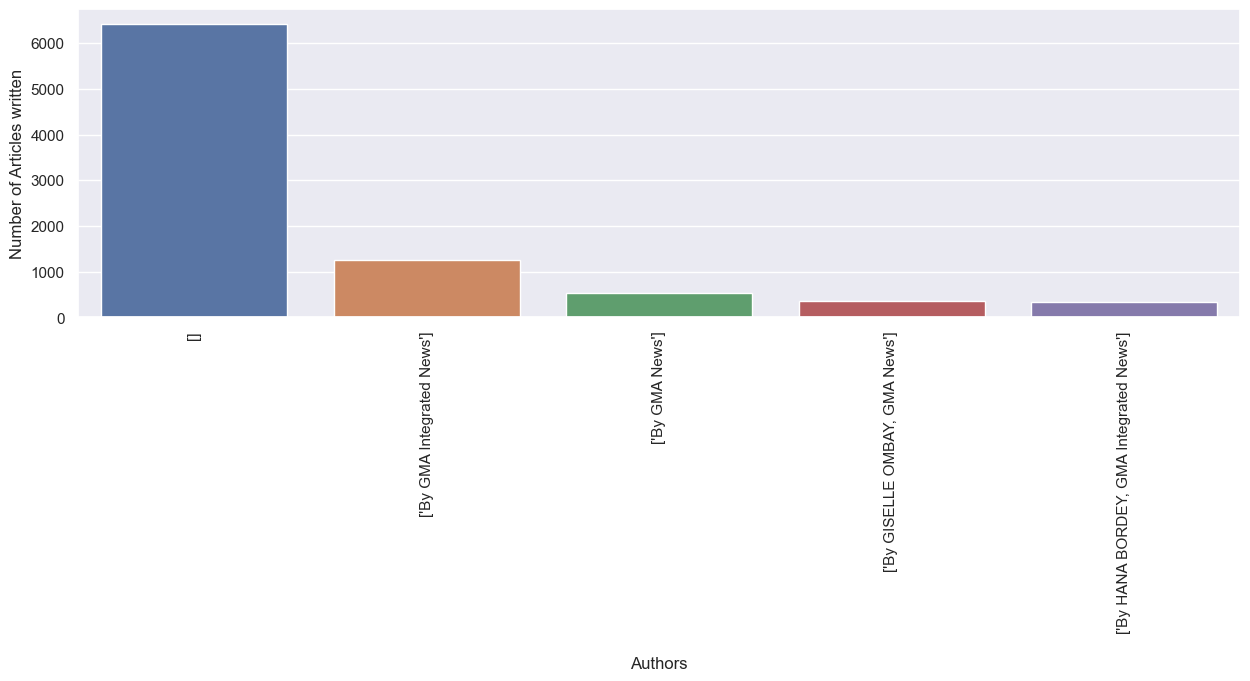

In [20]:
#Visualizing top 5 authors
d = df_cleaneddata['Author'].value_counts().sort_values(ascending=False).head(5)
d = pd.DataFrame(d)
d = d.reset_index()

sns.set()
plt.figure(figsize=(15,4))
sns.barplot(x='index', y='Author', data=d)
plt.xlabel("\nAuthors")
plt.ylabel("Number of Articles written")
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()


In [21]:
y = df_cleaneddata.label
print(f'Ratio of real and fake news:')
y.value_counts(normalize=True).rename({1: 'real', 0: 'fake'})

Ratio of real and fake news:


fake    0.805616
real    0.194384
Name: label, dtype: float64

In [22]:
df_cleaneddata.drop(["Unnamed: 0", "Link", "Author"], axis=1, inplace=True)

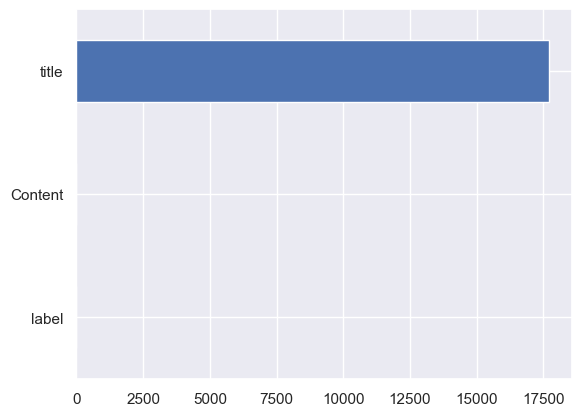

In [23]:
df_cleaneddata.isnull().sum().plot(kind="barh")
plt.show()

In [24]:
df_cleaneddata.isnull().sum()

label          0
Content        1
title      17705
dtype: int64

In [25]:
df_cleaneddata = df_cleaneddata.fillna('')

In [26]:
df_cleaneddata.isnull().sum()

label      0
Content    0
title      0
dtype: int64

In [27]:
df_cleaneddata.nunique()

label          2
Content    23135
title       6257
dtype: int64

In [28]:
df_cleaneddata['label'].unique()

array([0., 1.])

In [29]:

df_cleaneddata['label'] = pd.to_numeric(df_cleaneddata['label'], errors='coerce').fillna(0.0)


In [30]:
df_cleaneddata["title_Content"] = df_cleaneddata["title"] + df_cleaneddata["Content"]
df_cleaneddata["body_len"] = df_cleaneddata["title_Content"].apply(lambda x: len(x) - x.count(" "))
df_cleaneddata.head()

,label,Content,title,title_Content,body_len
0,0.0,"Ayon sa TheWrap.com, naghain ng kaso si Krupa,...",,"Ayon sa TheWrap.com, naghain ng kaso si Krupa,...",1329
1,0.0,Kilala rin ang singer sa pagkumpas ng kanyang ...,,Kilala rin ang singer sa pagkumpas ng kanyang ...,768
2,0.0,"BLANTYRE, Malawi (AP) -- Bumiyahe patungong Ma...",,"BLANTYRE, Malawi (AP) -- Bumiyahe patungong Ma...",291
3,0.0,"Kasama sa programa ang pananalangin, bulaklak ...",,"Kasama sa programa ang pananalangin, bulaklak ...",346
4,0.0,Linisin ang Friendship Department dahil dadala...,,Linisin ang Friendship Department dahil dadala...,132


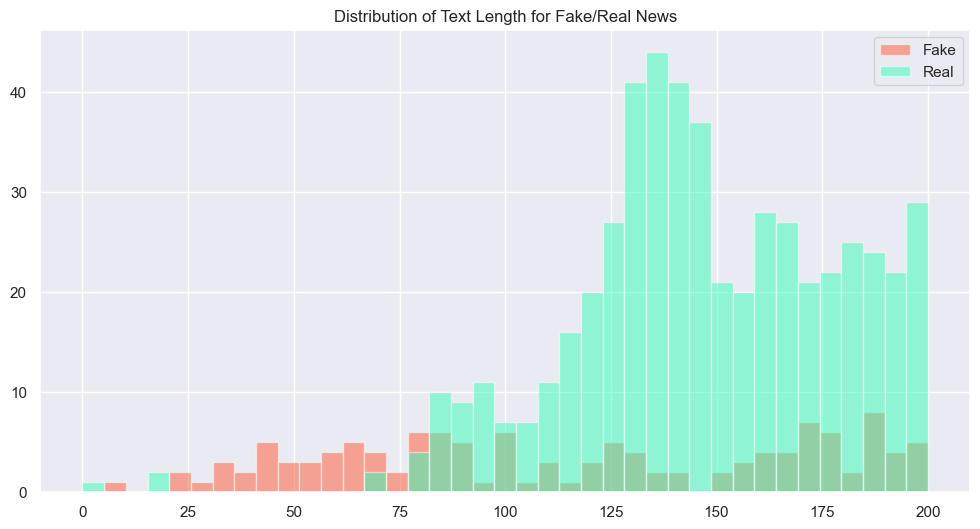

In [31]:
bins = np.linspace(0, 200, 40)

plt.figure(figsize=(12, 6))
plt.hist(df_cleaneddata[df_cleaneddata["label"] == 1]["body_len"], bins, alpha=0.5, label="Fake", color="#FF5733")
plt.hist(df_cleaneddata[df_cleaneddata["label"] == 0]["body_len"], bins, alpha=0.5, label="Real", color="#33FFB8")

plt.title('Distribution of Text Length for Fake/Real News')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

Text(0.5, 1.0, 'Distribution of Fake/Real News')

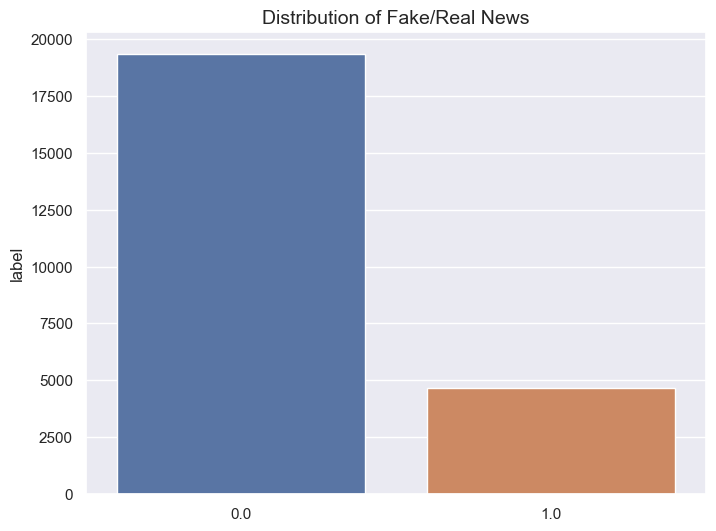

In [32]:
class_names = ['fake', 'real'] 
label_count = df_cleaneddata.label.value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=label_count.index, y=label_count)
plt.title('Distribution of Fake/Real News',fontsize =14)

In [33]:
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: label, dtype: float64

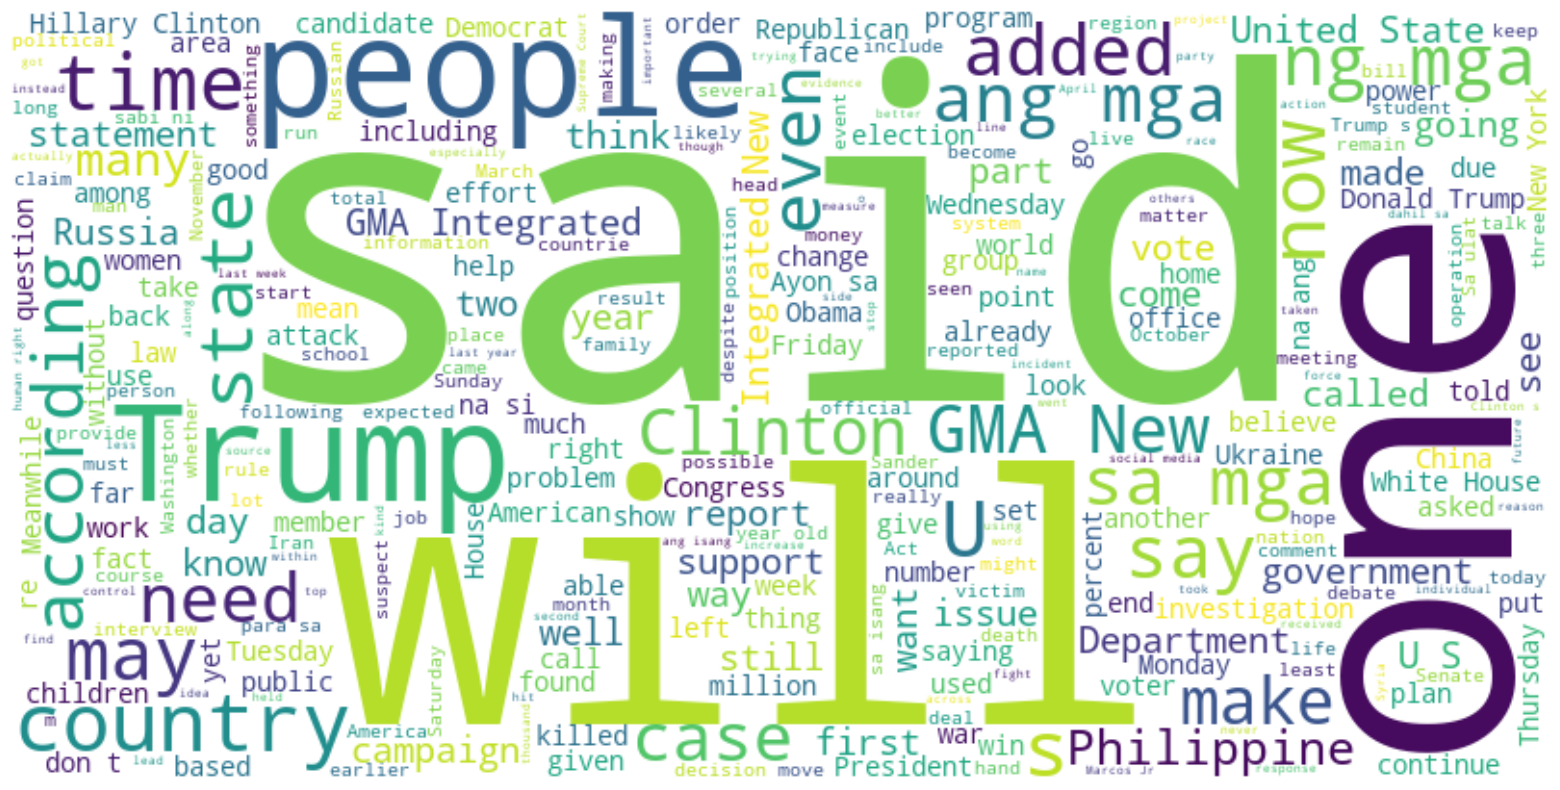

In [34]:
titles = ' '.join(title for title in df_cleaneddata['title_Content'])
wordcloud = WordCloud(
    background_color='white', 
    max_words=300,
    width=800, 
    height=400,
).generate(titles)

plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

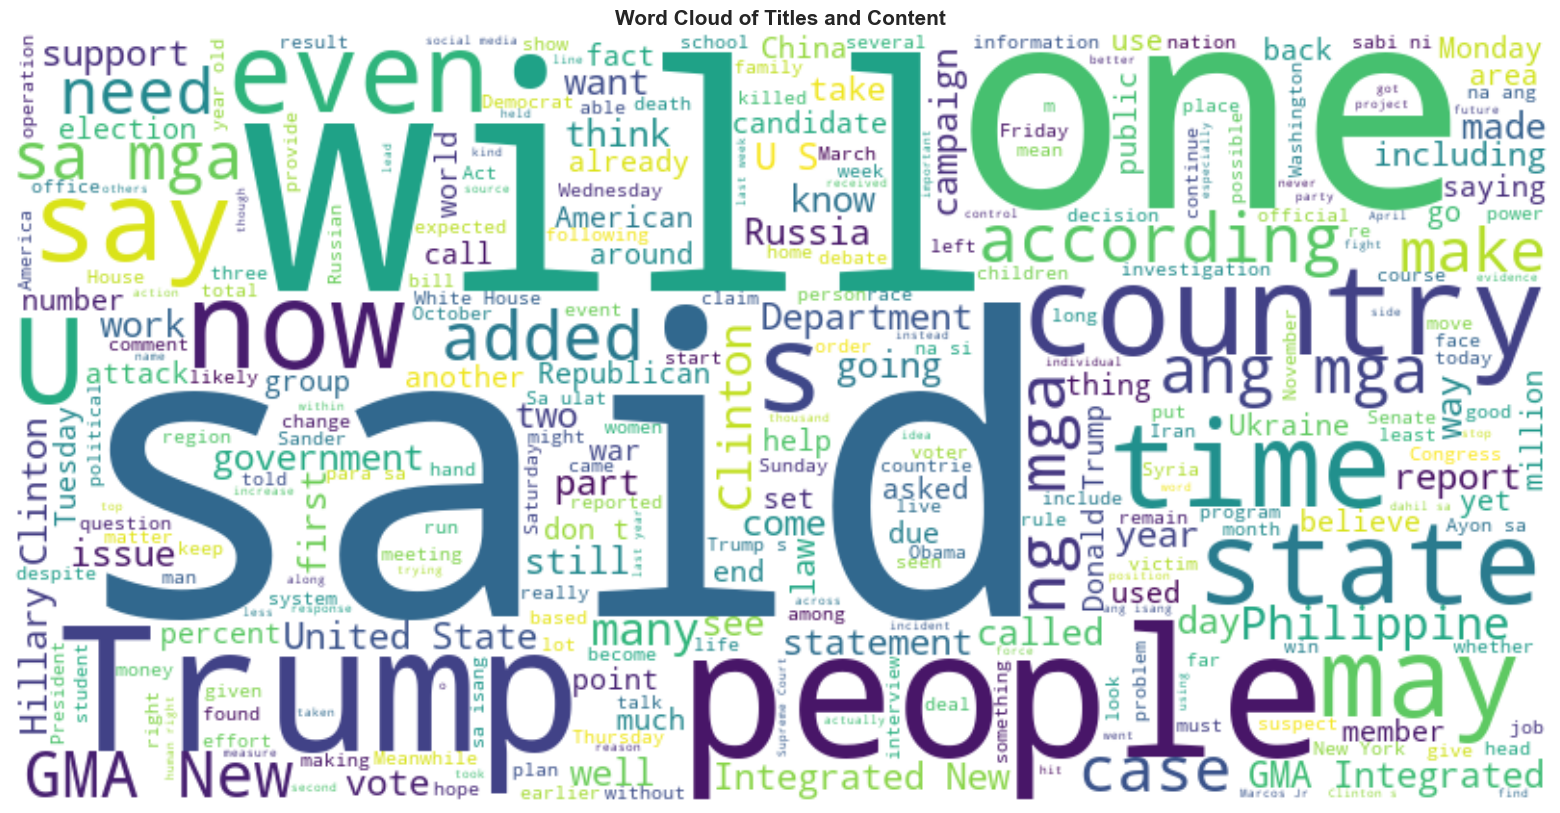

In [35]:
df_cleaneddata['title_Content'] = df_cleaneddata['title'] + ' ' + df_cleaneddata['Content']
titles = ' '.join(title for title in df_cleaneddata['title_Content'])
wordcloud = WordCloud(
    background_color='white', 
    max_words=300,
    width=800, 
    height=400,
).generate(titles)

# Display the word cloud
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Titles and Content", fontsize=15, weight='bold')
plt.show()

In [36]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
df_cleaneddata['Content'] = df_cleaneddata['Content'].apply(lambda x: tokenizer.tokenize(x))
print(df_cleaneddata.head())

   label                                            Content title  \
0    0.0  [Ayon, sa, TheWrap, com, naghain, ng, kaso, si...         
1    0.0  [Kilala, rin, ang, singer, sa, pagkumpas, ng, ...         
2    0.0  [BLANTYRE, Malawi, AP, Bumiyahe, patungong, Ma...         
3    0.0  [Kasama, sa, programa, ang, pananalangin, bula...         
4    0.0  [Linisin, ang, Friendship, Department, dahil, ...         

                                       title_Content  body_len  
0   Ayon sa TheWrap.com, naghain ng kaso si Krupa...      1329  
1   Kilala rin ang singer sa pagkumpas ng kanyang...       768  
2   BLANTYRE, Malawi (AP) -- Bumiyahe patungong M...       291  
3   Kasama sa programa ang pananalangin, bulaklak...       346  
4   Linisin ang Friendship Department dahil dadal...       132  


In [37]:
!pip install nltk
import nltk

nltk.download('omw-1.4')

from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
df_cleaneddata['Content'] = df_cleaneddata['Content'].apply(lambda x: [lemmatizer.lemmatize(y) for y in x])
print(df_cleaneddata.head())

[nltk_data] Downloading package omw-1.4 to /Users/admin/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


   label                                            Content title  \
0    0.0  [Ayon, sa, TheWrap, com, naghain, ng, kaso, si...         
1    0.0  [Kilala, rin, ang, singer, sa, pagkumpas, ng, ...         
2    0.0  [BLANTYRE, Malawi, AP, Bumiyahe, patungong, Ma...         
3    0.0  [Kasama, sa, programa, ang, pananalangin, bula...         
4    0.0  [Linisin, ang, Friendship, Department, dahil, ...         

                                       title_Content  body_len  
0   Ayon sa TheWrap.com, naghain ng kaso si Krupa...      1329  
1   Kilala rin ang singer sa pagkumpas ng kanyang...       768  
2   BLANTYRE, Malawi (AP) -- Bumiyahe patungong M...       291  
3   Kasama sa programa ang pananalangin, bulaklak...       346  
4   Linisin ang Friendship Department dahil dadal...       132  


In [38]:
df_cleaneddata['Content'] = df_cleaneddata['Content'].apply(lambda x: ' '.join(x))

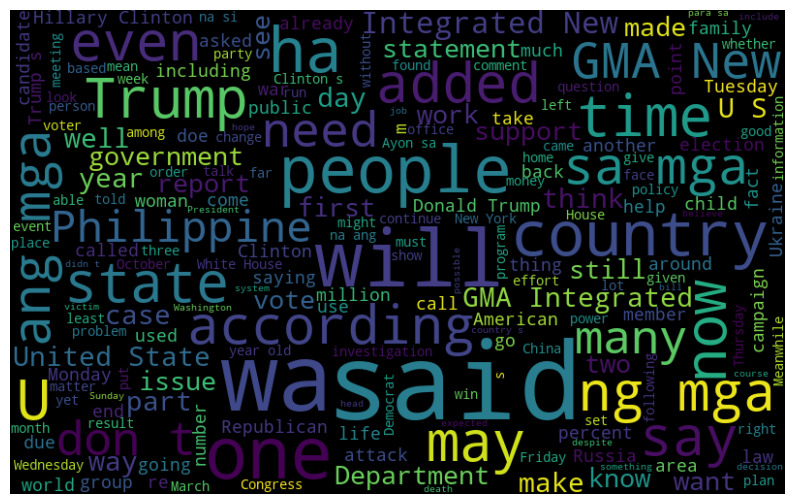

In [39]:
all_words = ' '.join([text for text in df_cleaneddata['Content']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [40]:
def to_vector_Tfidf(df, col):
    from sklearn.feature_extraction.text import TfidfVectorizer
    vectorizer = TfidfVectorizer(max_features=2000)
    vectorizer.fit(df[col])
    return vectorizer.transform(df_cleaneddata[col])

In [41]:
text_vector_tfidf = to_vector_Tfidf(df_cleaneddata, 'Content')
print("Shape of the tfidf vector: ", text_vector_tfidf.shape)
print(text_vector_tfidf.shape)

Shape of the tfidf vector:  (24040, 2000)
(24040, 2000)


In [42]:
df_cleaneddata = df_cleaneddata[['Content']].copy(deep=True)
df_cleaneddata

,Content
0,Ayon sa TheWrap com naghain ng kaso si Krupa 3...
1,Kilala rin ang singer sa pagkumpas ng kanyang ...
2,BLANTYRE Malawi AP Bumiyahe patungong Malawi s...
3,Kasama sa programa ang pananalangin bulaklak a...
4,Linisin ang Friendship Department dahil dadala...
...,...
24035,The winner of the special election in Cavite t...
24036,The remains of four people inside the Cessna p...
24037,A Kabataan Party list representative visited t...
24038,The Philippine Coast Guard is expected to have...


In [43]:
df_cleaneddata['length'] = df_cleaneddata['Content'].str.count(' ') + 1
df_cleaneddata['LoR'] = df_cleaneddata['Content'].str.len()
df_cleaneddata

,Content,length,LoR
0,Ayon sa TheWrap com naghain ng kaso si Krupa 3...,266,1531
1,Kilala rin ang singer sa pagkumpas ng kanyang ...,153,885
2,BLANTYRE Malawi AP Bumiyahe patungong Malawi s...,52,331
3,Kasama sa programa ang pananalangin bulaklak a...,65,402
4,Linisin ang Friendship Department dahil dadala...,25,151
...,...,...,...
24035,The winner of the special election in Cavite t...,664,3950
24036,The remains of four people inside the Cessna p...,252,1416
24037,A Kabataan Party list representative visited t...,298,1759
24038,The Philippine Coast Guard is expected to have...,331,1955


In [44]:
df_cleaneddata["length"].mean()

461.01821963394343

In [45]:
df_cleaneddata["LoR"].mean()

2643.9607737104825